In [209]:
# Make sure to install or update biopython
# Import the required functions to complete some of the suggested tasks.
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
import pandas as pd
from ggplot import *
%matplotlib inline 

In [210]:
## 1 ##
## This function gets sequences from fasta a file
## please finish documenting this function with comments, or in notebook markdown text
## be sure to provide details on return types and arguments
def get_sequences_from_file(fasta_fn):                             #function takes a fasta file as input
    sequence_data_dict = {}                                        #Define an empty variable
    for record in SeqIO.parse(fasta_fn, "fasta"):                  #For every fasta sequence, use built in biopython function
        description = record.description.split()                   #split the output of this built in function and store in the define variable
        species_name = description[1] + " " + description[2]       #define a variable and store in the name, space and then sequences
        sequence_data_dict[species_name] = record.seq              #Append the empty variable with the sequences from previous step
    return(sequence_data_dict)                                     #Return a dictionary with species as key and sequences


In [211]:
## 2##
## This function translates a string of nucleotides to amino acids
def translate_function(string_nucleotides):                                          #Function takes a string of nucleotides
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]      #Built in function returns a table of codons and it's corresponding amino acid IUPAC code
    codons = [string_nucleotides[i:i+3] for i in range(0,len(string_nucleotides),3)] # This loops through every 3rd position in string_nucleotides to get codons.
    #mito_table.forward_table[codons] # This retrieves the amino acid sequences      # will exit if stop codon is reached else appends the empty variable defined
    aa_seq_string = []
    for codon in codons:
        aa = mito_table.forward_table.get(codon,"stop")
        if aa == "stop":
            break
        else:
            aa_seq_string.append[aa]
        
  
    return (''.join(aa_seq_string))                                                  #Returns amino acid translations


In [212]:
## 3 ##
#from Bio.Seq import Seq
#from Bio.Alphabet import IUPAC
#Use available biopython libraries for this task. The built in function for this is translate() from Seq function in Bio.Seq
#source: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

def translate_easy(string_nucleotide):                                    #Function takes a string of nucleotides
    aa = Seq.translate(string_nucleotide,table=2,to_stop=True)            #Returns translated amino acids using IUPAC codes
    return aa



In [213]:
## 4 ## Count aa
#This functions counts the number of amino acids present with respect to charge, polarity nd hydrophobicity
def get_proportion_aa_type_function(aa_seq):          #Function takes a biopython seq
    charged = ['R','K','D','E']                       #Variables define what charged, polar and hydrophobic aa are
    polar = ['Q','N','H','S','T','Y','C','M','W']
    hydrophobic = ['A','I','L','F','V','P','G']
    charged_count = count_aa_seq(aa_seq , charged)          #count the number of times that aa appears, add to the total for charged
    polar_count = count_aa_seq(aa_seq , polar)                 #repeat for polar and 
    hydrophobic_count = count_aa_seq(aa_seq , hydrophobic)     #repeat for hydrophobic
    seq_len = len( aa_seq)                                     #find the length of each aa sequence
    return {"p_ratio": float(polar_count)/seq_len,             #Returns a dictionary with proportions of each aa type
            "c_ratio": float(charged_count)/seq_len,
            "h_ratio": float(hydrophobic_count)/seq_len}   

def count_aa_seq(aa_seq , to_count):                 #efine a function that takes out put from the previous function
    counter = 0                                                        
    for i in to_count:                                #Loop through all the three categories and add to counter
        counter += aa_seq.count(i)
    
    return counter                                    #Returns the count of charged, polar and hydrophobic aa

In [214]:
##MAIN###
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")

bear_df = pd.read_csv("bears_data.csv") #Includes only data for body mass currently and empty cells for other columns
species_list = list(bear_df.species)    

In [215]:
## 5 ##
## Write a for-loop that translates each sequence and also gets the proportion
## of each aa type in that translated sequence and adds those data to dataframe
# get proportions of each aa type
#set the value of each proportion in the dataframe (i.e., fill in empty cells in DF)
to_count = 0
counter = 0
for key, value in cytb_seqs.items():                      #sets the respective values for every speices in bear_df
    aa_seq = translate_easy(value)                        #Translate the fasta sequences for each species into amino acids
    count_aa = get_proportion_aa_type_function(aa_seq)    #Count the number of amino acids for each type
    
#set the value of each proportion in the dataframe (i.e., fill in empty cells in DF)
    bear_df.set_value(counter,"charged",(count_aa["c_ratio"]))           #charged amino acid
    bear_df.set_value(counter,"polar",(count_aa["p_ratio"]))             #Polar amino acid
    bear_df.set_value(counter,"hydrophobic",(count_aa["h_ratio"]))       #Hydrophobic amino acid
    counter =counter+1
    
print(bear_df)          #Isn't this great, we finally got it!
    


                  species     mass   charged     polar  hydrophobic
0          Ursus spelaeus  550.800  0.092348  0.327177     0.580475
1            Ursus arctos  203.500  0.089710  0.335092     0.575198
2        Ursus thibetanus   99.714  0.092348  0.329815     0.577836
3        Melursus ursinus  100.030  0.089710  0.340369     0.569921
4        Ursus americanus  110.560  0.092348  0.324538     0.583113
5     Helarctos malayanus   47.020  0.089710  0.343008     0.567282
6  Ailuropoda melanoleuca  118.200  0.092348  0.327177     0.580475
7      Tremarctos ornatus  140.700  0.092348  0.340369     0.567282
8         Ursus maritimus  425.100  0.089710  0.337731     0.572559


In [216]:
## 6 ##
## What is the largest bear species? What else is interesting about this species? 

##Ursus spelaeus, is the largest species. It is believed to have spent more of its time in caves 
    #than Brown bears because most of the fossils were found in caves hence the name spelaeus, common name cave bear.


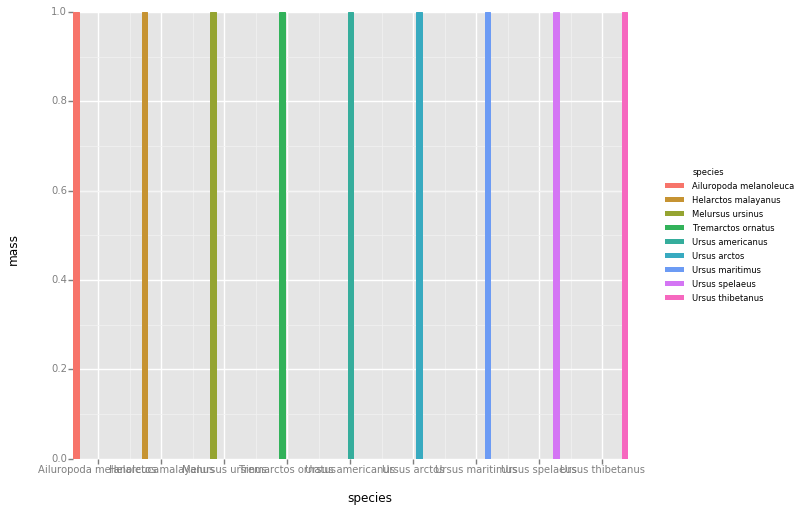

<ggplot: (19888420)>

In [217]:
## Plot a bar-chart of the mass with the x-axes labeled with species names.
ggplot( aesthetics= aes(x = 'species', y = 'mass', fill='species'), data = bear_df)+\
geom_bar(stat='identity') 

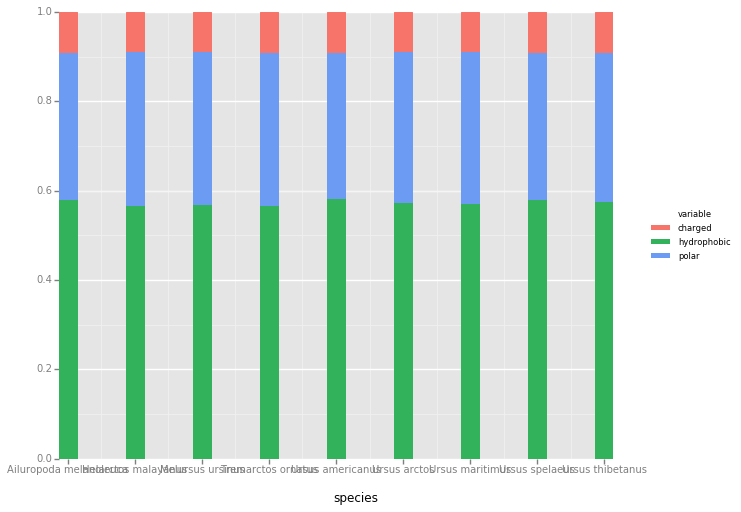

<ggplot: (18024771)>

In [218]:
## 7 ##
## Plot a visualization of the proportions for amino-acid type for the bear species
## What does this show about cytochrome-b for the bears? 
    #This shows that cytochrome-b is well conserved across these ancient species.
subset_df= bear_df[['species', 'charged' , 'polar', 'hydrophobic']]                                    #subset the data
melt_bears=pd.melt(subset_df, id_vars='species')                                                       #Melt subset data
ggplot(aes(x='species', weight="value", fill='variable'), data=melt_bears) + geom_bar(position='stack')

In [219]:
## 8 ##
## Save the new dataframe to a file called "bears_mass_cytb.csv"
bear_df.to_csv('Results/complete_bears_data.csv')        #writes complete file as a csv

In [220]:
## BONUS ##
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)